<a href="https://colab.research.google.com/github/rmonterof/Scikit-learn/blob/main/1_3_Regresi%C3%B3n_polin%C3%B3mica_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regresión polinómica
Ejemplo con dataset salaries_experience.csv

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.dpi'] = 110

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
df = pd.read_csv("/content/salaries_experience.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


from matplotlib import pyplot as plt
_df_0['YearsExperience'].plot(kind='hist', bins=20, title='YearsExperience')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Salary'].plot(kind='hist', bins=20, title='Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='YearsExperience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['YearsExperience']
  ys = series['Salary']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('YearsExperience', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('YearsExperience')
_ = plt.ylabel('Salary')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['YearsExperience']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'YearsExperience'}, axis=1)
              .sort_values('YearsExperience', ascending=True))
  xs = counted['YearsExperience']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('YearsExperience', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('YearsExperience')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['YearsExperience'].plot(kind='line', figsize=(8, 4), title='YearsExperience')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Salary'].plot(kind='line', figsize=(8, 4), title='Salary')
plt.gca().spines[['top', 'right']].set_visible(False)

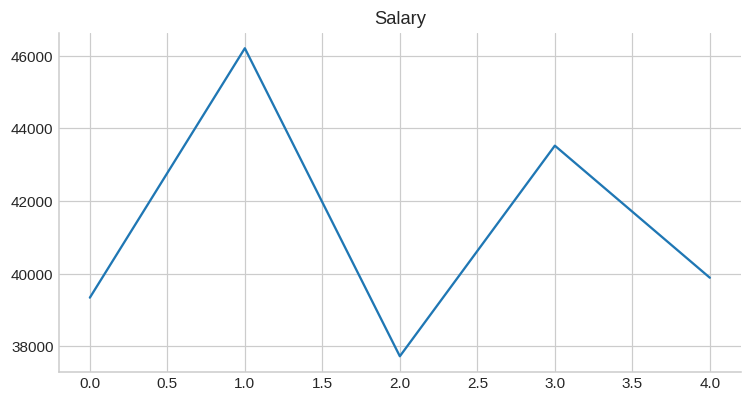

In [50]:
from matplotlib import pyplot as plt
_df_6['Salary'].plot(kind='line', figsize=(8, 4), title='Salary')
plt.gca().spines[['top', 'right']].set_visible(False)

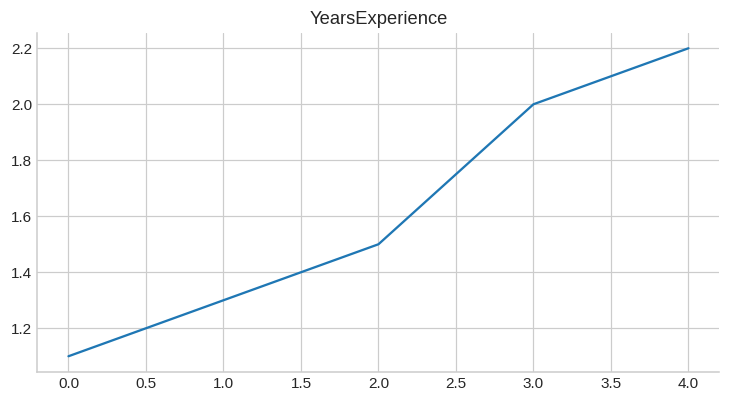

In [49]:
from matplotlib import pyplot as plt
_df_5['YearsExperience'].plot(kind='line', figsize=(8, 4), title='YearsExperience')
plt.gca().spines[['top', 'right']].set_visible(False)

In [53]:
X = df.YearsExperience # level
print(X)

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64


In [63]:
y = df.Salary # salary
print(y)

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64


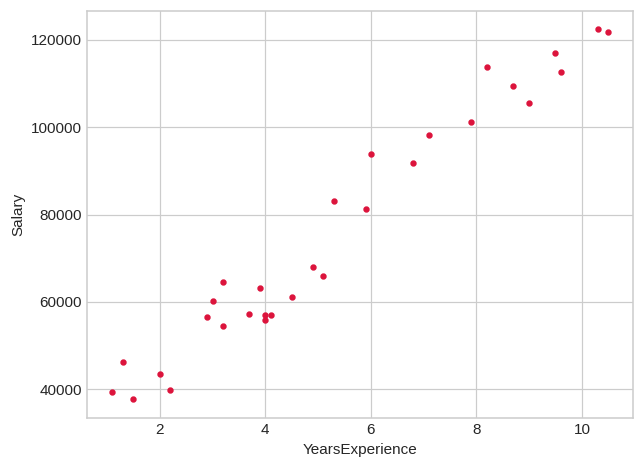

In [61]:
polin=plt.scatter(X, y, c="crimson", s=10)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

## Regresión lineal

In [66]:
model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)
y_pred = model.predict(X.values.reshape(-1, 1))

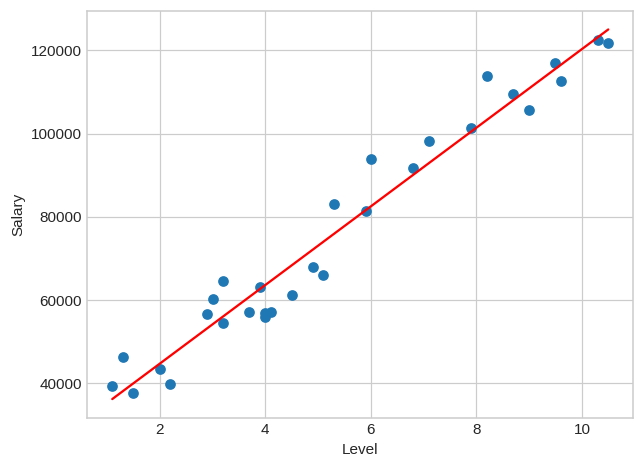

In [68]:
plt.scatter(X, y)

plt.plot(X, y_pred, c='r')

plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [69]:
r2_score(y, y_pred)

0.9569566641435086

In [70]:
mean_absolute_error(y, y_pred)

4644.2012894435375

In [71]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
rmse

np.float64(5592.043608760661)

## Regresión polinómica

In [75]:
# poly = PolynomialFeatures(degree=2)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X.values.reshape(-1, 1))

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

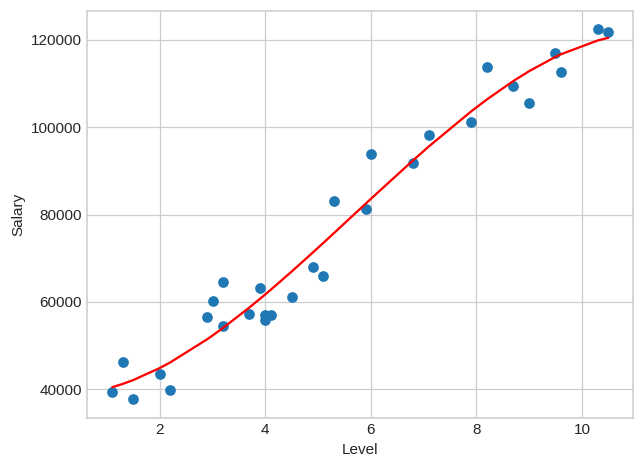

In [76]:
plt.scatter(X, y)
plt.plot(X, y_pred, c='r')
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [77]:
r2_score(y, y_pred)

0.9635969766249464

In [78]:
mean_absolute_error(y, y_pred)

4269.0704575531945

In [79]:
rmse = np.sqrt(mean_squared_error(y,y_pred))
rmse

np.float64(5142.642278716045)